In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

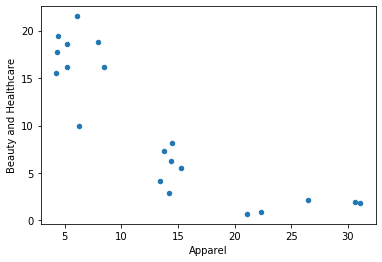

In [9]:
cust_sp = pd.read_csv("customerspends.csv",index_col=0)
#sns.regplot(x="Apparel", y="Beauty and Healthcare",data=cust_sp)
cust_sp.plot.scatter(x="Apparel", y="Beauty and Healthcare")

In [10]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(cust_sp[["Apparel","Beauty and Healthcare"]])
scaled_data

array([[ 0.892371  , -1.26688022],
       [ 0.20647107, -0.59775334],
       [-0.96318111,  1.22840542],
       [ 2.06085469, -1.11353864],
       [-0.85801758,  1.63266957],
       [ 0.12117176, -0.22136947],
       [-0.57991846,  0.89384198],
       [ 1.52335219, -1.05777807],
       [-1.06600768,  1.10294413],
       [ 0.03353548, -0.34683076],
       [-0.96551808,  0.89384198],
       [ 0.08611725, -0.96019707],
       [-1.05899677,  1.33992657],
       [-1.07652403,  0.79626098],
       [ 1.03258904, -1.23899993],
       [-0.65002748,  1.25628571],
       [-0.00736145, -0.7789752 ],
       [ 2.00243051, -1.0995985 ],
       [ 0.10948692, -0.48902022],
       [-0.84282729,  0.02676507]])

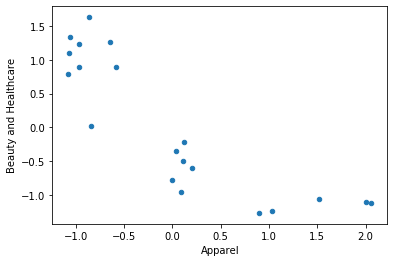

In [25]:
scaled_df = pd.DataFrame(scaled_data,columns=cust_sp.columns)
scaled_df.plot(kind="scatter",x="Apparel", y="Beauty and Healthcare")

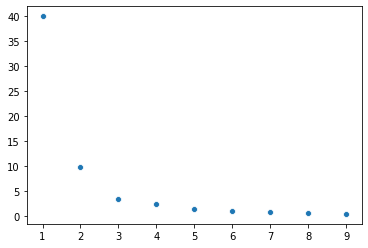

In [30]:
from sklearn.cluster import KMeans
clusters = range(1,10)
errors = []
for i in clusters:
    K_clus = KMeans(i)
    K_clus.fit(scaled_data)
    errors.append(K_clus.inertia_)
sns.scatterplot(x=clusters, y=errors)

In [31]:
K_clus3 = KMeans(3,random_state=10)
K_clus3.fit(scaled_data)
cust_sp["Clusterid"] = K_clus3.labels_

In [32]:
cust_sp

,Apparel,Beauty and Healthcare,Clusterid
Customer,,,
1,21.10,0.70,2
2,15.23,5.50,0
3,5.22,18.60,1
4,31.10,1.80,2
5,6.12,21.50,1
6,14.50,8.20,0
7,8.50,16.20,1
8,26.50,2.20,2
9,4.34,17.70,1


In [35]:
K_clus2 = KMeans(2,random_state=10)
K_clus2.fit(scaled_data)
cust_sp["Clusterid2"] = K_clus2.labels_

In [36]:
cust_sp

,Apparel,Beauty and Healthcare,Clusterid,Clusterid2
Customer,,,,
1,21.10,0.70,2,0
2,15.23,5.50,0,0
3,5.22,18.60,1,1
4,31.10,1.80,2,0
5,6.12,21.50,1,1
6,14.50,8.20,0,0
7,8.50,16.20,1,1
8,26.50,2.20,2,0
9,4.34,17.70,1,1


In [37]:
K_clus2.cluster_centers_

array([[ 0.73281986, -0.83372195],
       [-0.89566872,  1.01899349]])